Exercises for Feynman Lectures on Physics. 
Solution to 19.41

$$
\begin{equation}
\left\{ \begin{aligned} 
m_1 \ddot{y}_1 &= - K(y_1 - y_2) \\
m_2 \ddot{y}_2 &= - k y_2 + K(y_1 - y_2) + m_3 R \omega^2 \cos(\omega t)
\end{aligned} \right.
\end{equation}
$$

$$
\begin{equation}
\left\{ \begin{aligned} 
\ddot{y}_1 + \frac{K}{m_1}(y_1 - y_2) &= 0 \\
\ddot{y}_2 + \frac{K}{m_2}(y_2 - y_1) + \frac{k}{m_2} y_2 &= \frac{m_3}{m_2} R \omega^2 \cos(\omega t)
\end{aligned} \right.
\end{equation}
$$

$$
\begin{align}
\omega_1^2 = \frac{K}{m_1}, \qquad
\omega_2^2 = \frac{k}{m_2}, \qquad
\omega_3^2 = \frac{K}{m_2}, \qquad
\varepsilon = \frac{m_3}{m_2}
\end{align}
$$

$$
\begin{equation}
\left\{ \begin{aligned} 
\ddot{y}_1 + \omega_1^2 (y_1 - y_2) &= 0, \\
\ddot{y}_2 + (\omega_2^2 + \omega_3^2) y_2 - \omega_3^2 y_1 &= \varepsilon R \omega^2 \cos(\omega t)
\end{aligned} \right.
\end{equation}
$$

$$
y_1 = \widehat{Y}_1 e^{i\omega t}, \qquad
y_2 = \widehat{Y}_2 e^{i\omega t},
$$

$$
\ddot{y}_1 = -\omega^2 \widehat{Y}_1 e^{i\omega t}, \qquad
\ddot{y}_2 = -\omega^2 \widehat{Y}_2 e^{i\omega t},
$$

$$
\left\{
\begin{aligned}
(-\omega^2 + \omega_1^2)\widehat{Y}_1 - \omega_1^2 \widehat{Y}_2 &= 0, \\[6pt]
-\omega_3^2 \widehat{Y}_1 + (-\omega^2 + \omega_2^2 + \omega_3^2)\widehat{Y}_2 &= \varepsilon R \omega^2
\end{aligned}
\right.
$$


$$
\widehat{Y}_2 =
\frac{\varepsilon R \omega^2 (\omega_1^2 - \omega^2)}{
(\omega_1^2 - \omega^2)(\omega_2^2 + \omega_3^2 - \omega^2)
- \omega_1^2 \omega_3^2
}
$$




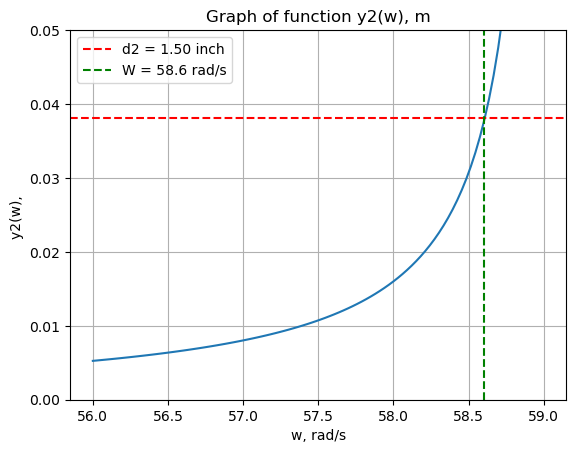

In [1]:
import numpy as np
import matplotlib.pyplot as plt

g = 9.81 # m/s**2

lbs  = 0.45359237 # kg
inch = 0.0254     # m

d1 =  6.0 * inch
d2 =  1.5 * inch
R  = 14.0 * inch 

m1 = 750     * lbs
m2 =  75     * lbs
m3 =   0.125 * lbs

e = m3/m2

ww1 = g/d1
ww2 = (1 + m1/m2)*g/d2
ww3 = m1/m2 * g/d1


def y2(w):
    ww = w**2
    res = (ww1 - ww)*(ww3 + ww2 - ww) - ww1*ww3
    res = e*ww*(ww1 - ww)/res
    res = res*R
    return res 


w_values = np.linspace(56, 59, 100)  

# Compute y values
y_values = y2(w_values)

# Plot the function
plt.plot(w_values, y_values)
plt.title("Graph of function y2(w), m")
plt.xlabel("w, rad/s")
plt.ylabel("y2(w), ")
plt.ylim(0.0, 0.05) 
y0 = d2
plt.axhline(y=y0   , color='red', linestyle='--', label=f'd2 = {(y0/inch):.2f} inch') 
plt.legend()
W = 58.6
plt.axvline(x=W, color='green', linestyle='--', label=f'W = {W} rad/s')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
import sympy as sp

w = sp.symbols('w', positive=True)
Y2 = e*R*w**2*(ww1 - w**2)/((ww1 - w**2)*(ww2 + ww3 - w**2) - ww1*ww3)
W = sp.nsolve(sp.Eq(Y2, d2), w, 58.)  # rad/s
print("W = {:.3f} rad/s".format(W))

kmh_to_mph = 2.23693629
v = W*R    # m/s
print("v = {:.1f} mph".format(v * kmh_to_mph)) # mph


W = 58.608 rad/s
v = 46.6 mph
